# PCA Videos

Run PCA on input videos as in curvature calcuation, then project back into pixel space and visualize videos

In [1]:
# plot curvature of walking video and plot trajectory
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
import os
import math
from PIL import Image
from Henaff_straightening.utils import computeDistCurv

num_pcs = 2

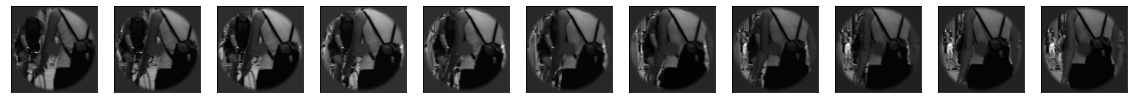

In [2]:
# load walking videos
im_dir = 'Henaff_straightening/stimuli/gamma1/walking'
PILtoTensor = torchvision.transforms.ToTensor()
walking_frames = torch.zeros((11,1,512,512))
for i in range(11):
    walking_frames[i,:,:,:] = PILtoTensor(Image.open(os.path.join(im_dir, 'groundtruth' + str(i+1) + '.png')))

# plot walking view sequence
fig, axes = plt.subplots(1,11, figsize=(20,12))
for i in range(11):
    frame = walking_frames[i,:,:]
    frame = frame - torch.min(frame)
    frame = frame / torch.max(frame)
    axes[i].imshow(torch.squeeze(frame), cmap='gray', vmin=0, vmax=1)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.savefig('walking_frames.png')

# performing PCA and projecting to first two componenets
walking_flattened = walking_frames.view( walking_frames.size(0), -1 )
# mean for centering
walking_mean = torch.mean(walking_flattened,axis=0)
walking_centered = walking_flattened - walking_mean
# PCA
U,S,V = torch.pca_lowrank(walking_centered, center=False, q=walking_frames.size(0))
walking_projected = torch.matmul(walking_centered, V[:, 0:num_pcs])

In [3]:
walking_frames_list = []
for i in range(11):
    walking_frames_list.append(Image.open(os.path.join(im_dir, 'groundtruth' + str(i+1) + '.png')))
    
walking_frames_list[0].save(fp='./walking_original.gif', format='GIF', append_images=walking_frames_list,
         save_all=True, duration=200, loop=0)

In [4]:
#project back into pixel space

In [5]:
walking_unprojected = torch.matmul(walking_projected, V[:,0:num_pcs].T) + walking_mean #undo centering 
walking_unprojected = walking_unprojected.reshape(walking_frames.shape)

#normalize
for i in range(11):
    frame = walking_unprojected[i,:,:]
    frame = frame - torch.min(frame)
    frame = frame / torch.max(frame)
    walking_unprojected[i] = frame

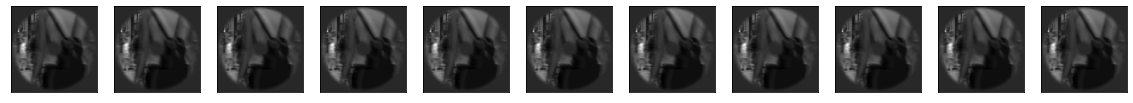

In [6]:
# plot walking view sequence
fig, axes = plt.subplots(1,11, figsize=(20,12))
for i in range(11):
    axes[i].imshow(torch.squeeze(frame), cmap='gray', vmin=0, vmax=1)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.savefig(f'walking_frames_reduced_{num_pcs}pcs.png')

In [7]:
#save as video

In [8]:
TensortoPIL = torchvision.transforms.ToPILImage()
walking_frames_reduced_pil = []
for i in range(11):
    walking_frames_reduced_pil.append(TensortoPIL(walking_unprojected[i]))

walking_frames_pca = []
for i in range(11):
    walking_frames_pca.append(walking_frames_reduced_pil[i])
    
walking_frames_pca[0].save(fp=f'./walking_pca_reduced_{num_pcs}pcs.gif', format='GIF', append_images=walking_frames_pca,
         save_all=True, duration=200, loop=0)